# Capstone Project Report

## I. Definition

### A. Project Overview
A cancerous tumour is a group of cancer cells that grow and destroy nearby tissues. Breast cancer is the type that usually starts in the cells of the breast. Over time, cells within the breasts may undergo changes and cease to grow or behave normally. These lead to non-cancerous (benign) breast conditions such as atypical hyperplasia and cysts, intraductal papillomas etc. But in some cases, these changes lead to breast cancer. Breast cancer usually starts in cells lining the ducts that carry milk from the glands to the nipple or in the cells of lobules, which are the groups of glands that make milk.

Breast cancer diagnosis usually begins with physical checks for the presence of lumps by feel and touch or through mammography. When this preliminary diagnosis signals any abnormailty, a biopsy is ordered to determine whether the tumor is benign or malignant. Clinical statistics indicate that only a small percentage of women with breast lumps actually get diagnosed with cancer. 

Biopsy can be performed by several techniques. The most well-established technique among them is the Fine Needle Aspiration (FNA) Cytology. A FNA uses a 10 ml or 20 ml syringe and a 23 gauge to 27 gauge needle. The needle passes through the skin and into a palpable lump or area of breast abnormality and extracts the suspicious cells which are then assessed under the microscope by a pathologist. The technique comes with many advantages, it is easy to perform, is quick and inexpensive, as compared to an elaborate surgical biopsy. However, there are many disadvantages to it as well. The test does not distinguish between in-situ and invasive cancer, there is a significant rate of non-diagnostic samples but most importantly, the test is often associated with a significant `false negative rate`, especially when conducted by pathologists who are not so experienced. 

While many of the disadvantages listed above are inherent to the nature of the FNA test, human errors resulting in false negative rates is definitely one aspect that will benefit from the application of machine learning techniques. Infact, since the tests result in a large number of features, it is quite necessary to have a develop a robust prediction model that can assess the test results and generate the result on whether the tumor is benign or not. Several researchers have attempted this and their work can be found in the References: [1-7]. Most of these researchers have tested their models on the widely used Wisconsin breast cancer dataset, which I will be using here as well. The dataset is available on the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

### B. Problem Statement
The problem in hand is thus a binary classification problem involving a large number of features. Here the inputs are the characteristics of the test culture (such as the radius, smoothness, compactness etc. of the distribution of cells), while the output is binary, i.e., benign or malign. 

So the method to approach this would be to understand the significance of the features, execute some strategies for feature reduction, apply a binary classification algorithm and iterate this process, until performance saturates. 

In short, the objective of this study is to build a predictive model that wil improve the accuracy, objectivity and reproducibility of breast cancer diagnosis by FNA. 


### C. Metrics
Since the dataset is not very large, cross-validation should be applied, such that there is a enough data used for training as well as for testing. Specifically I am going to look at the metrics - accuracy, precision, recall, F-beta scores (which is a single score metric combining the precision and recall values). F1-score which is a harmonic mean of precision, recall might possibly a good metric in this case, to understand the balance between precision and recall obtained by the model. For comparison of models, I am going to look at the averaged metrics across the folds as well as the minimum, maximum values achieved over the folds. 

Since the idea to test a variety of classifiers, it would be a good idea to compare the performances of each of the classifiers in terms of accuracy, F1-score as well times spent in training and testing. 

Futher the hyperparameters of the classifiers can be optimized by maximizing the scores over a grid search. And there must be caution to avoid overfitting. 

## II. Analysis

### A. Data Exploration & Exploratory Visualization

The dataset used in this work is the widely used Wisconsin University breast cancer dataset. Features are computed from digitized images of fine needle aspirates (FNA) of breast masses. Specifically, the characteristics of the cell nuclei present in the images are recorded.

The database is available on Kaggle, as well as through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

It is also found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The dataset has 569 rows and 33 columns. Amongst the 33 columns, the first two are `ID number` and `Diagnonsis (M=malignant, B = benign)`. And the last column is an unnamed column with only NaN values, so it is removed right away. The other 30 columns correspond to mean, standard deviation and the largest values (points on the tails) of the distributions of the following 10 features computed for the cellnuclei;

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values) 
- perimeter 
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0) 
- concavity (severity of concave portions of the contour) 
- concave points (number of concave portions of the contour) 
- symmetry 
- fractal dimension ("coastline approximation" - 1)


All feature values are recorded with four significant digits. The class distribution of the samples is such that 357 are benign and 212 are malignant, which is quite balanced. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline
import visuals as vs
import analysis as als
import random 

random.seed(50)

Output and features are first extracted from the complete dataset. 

In [2]:
data = pd.read_csv('data.csv')
data.columns
# Removing the last unnamed columns
data = data.drop(['Unnamed: 32'], axis =1)
output, features = als.split_data(data)

Below is a statistical description of the 30 dataset features. As mentioned before, the 30 features correspond to the mean, standard deviation and "worst values" of the measured cell culture characteristics such as radius, texture, area, smoothness etc. 

In [3]:
display(features.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From what it seems, `area` is a parameter that is well spread out, i.e., it has a large standard deviation, but it's probably only because `area` is a squared function of the radius. In the next few steps, I will do further data exploration in the following order

1. Visualize the distribution statistics; apply appropriate data preprocessing steps
2. Look for outliers
3. Observe feature correlations that will guide in feature selection

### Data Preprocessing, Outlier Detection

The following plots shows histograms of 6 features - 'area_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean'

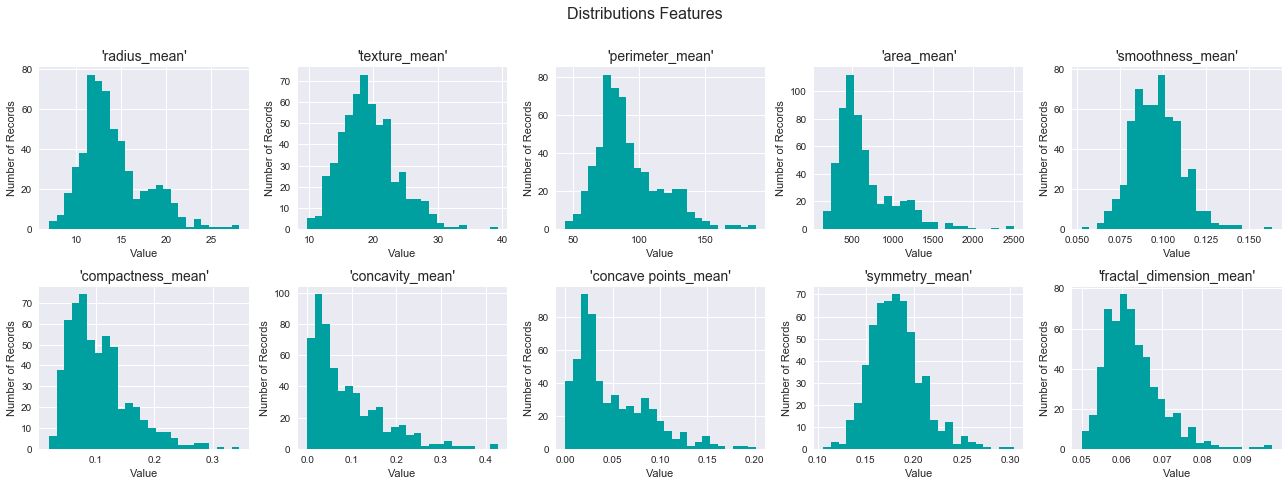

In [4]:
vs.distribution(features)

I am first going to look for outliers, remove them and observe the distributions again. 

It is to be noted that the features contain `mean`, `se` and `worst` values of the measurements of the 10 features describe in section I. Since `worst` and `se` values determine the quality of measured data, I am going to observe only the last 20 features for removing outliers. 

I am using `als.print_outliers()` for this. This function looks for outliers in each of the features, that are lying `how_far` steps away from its respective interquartile range. Each of these bad points are counted in a dictionary and finally bad points to be discarded are selected as those that occurred with highest frequency i.e., points that were bad in most features (as determined by the `worst_th` parameter).

In [5]:
outlier_indices = als.print_outliers(features, worst_th=3)

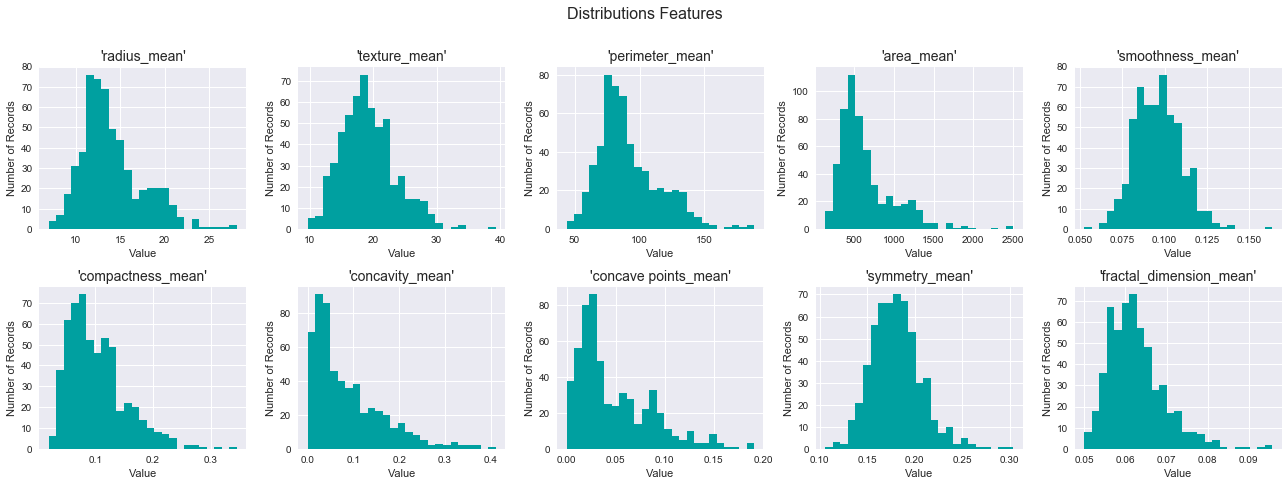

In [6]:
# Cleaning dataset by dropping outliers (cl)
data_cl = data.drop(data.index[outlier_indices]).reset_index(drop=True) # cleaned data
output_cl, features_cl = als.split_data(data_cl)

vs.distribution(features_cl)

In [7]:
print 'Size of new dataset is {0:.2f} % of the original'.format(100.0*len(data_cl)/len(data))

Size of new dataset is 98.59 % of the original


As can be seen from the above two plots, the distribution characteristics have definitely changed, especially w.r.t to the features depicting dimensions of the cell cultures, if not for features like `concavity_mean`, `concave_points_mean`, `symmetry_mean` and `fractional_dimension_mean`

Before proceeding with other visualization techniques, I will apply logarithmic transormations to features (to see if it will remove the skewness) and apply min-max scaling as well. These data preprocessing steps might be useful in further steps where I will be analysing the effects of each of these features on classification.

In [8]:
# Applying log transfromation and minmax scaling (tr)
features_cl_tr = als.transform_log_minmax(features_cl) # cleaned, transformed data
data_cl_tr = pd.concat([output_cl, features_cl_tr], axis=1)

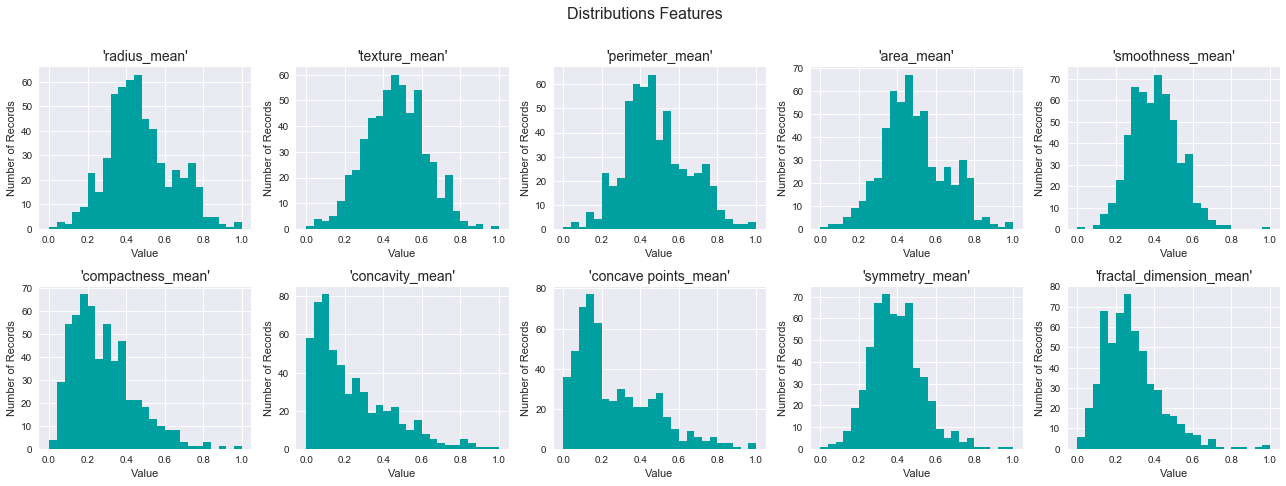

In [9]:
vs.distribution(features_cl_tr)

Skewness has reduced in most plots except for `concavity_mean`, `concave_points_mean` and `fractal_dimension_mean`. I am going to look for outliers again and check the distribution statistics again 

In [10]:
outlier_indices = als.print_outliers(features_cl_tr,worst_th=3)

In [11]:
# Cleaning dataset again - dropping outliers
data_cl_tr_cl = data_cl_tr.drop(data_cl.index[outlier_indices]) # cleaned transformed cleaned data
output_cl_tr_cl, features_cl_tr_cl = als.split_data(data_cl_tr_cl)

In [12]:
print 'Size of new dataset is {0:.2f} % of the original'.format(100.0*len(data_cl_tr_cl)/len(data))

Size of new dataset is 96.13 % of the original


Below is a plot showing the size distribution of benign and malign samples, before and after data transformation operations.

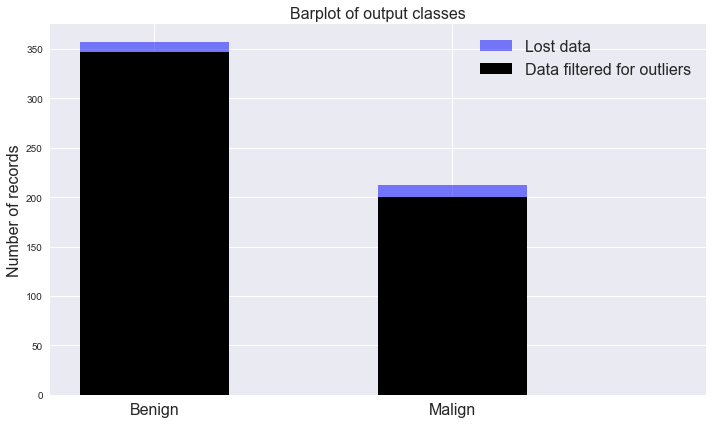

In [13]:
vs.show_output_classes(output, output_cl_tr_cl)

As seen, we haven't lost too much data. Outliers seem to have been removed almost equally in both classes and since this is a classification problem, I believe this data pre-processing step would definitely be useful in producing a robust model.

I am now going to create violin plots of the features split across the diagnosis type. Violin plots represent probability distributions of samples, similar to histograms and box plots. But, rather than showing counts of data points, violin plots use kernel density estimation (KDE) to compute empirical distributions of the samples. 

### Visualizing feature effects

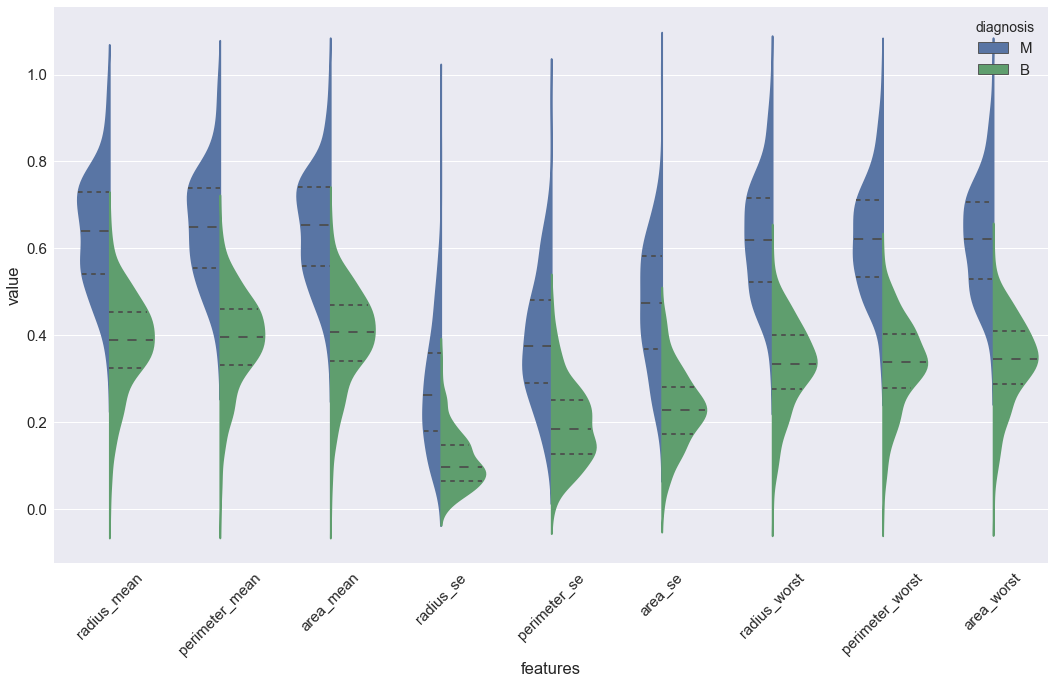

In [14]:
vs.violin_swarm_plots(data_cl_tr_cl,which='only_dims') # first 10 features

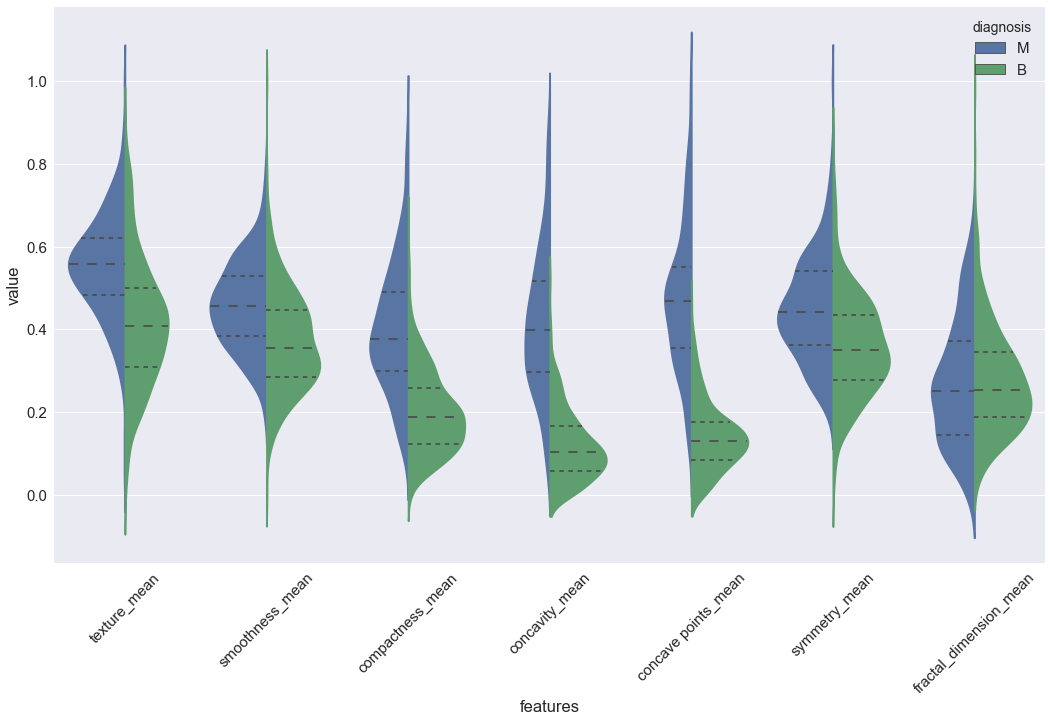

In [15]:
vs.violin_swarm_plots(data_cl_tr_cl,which='mean_non_dims') # Next 10 features

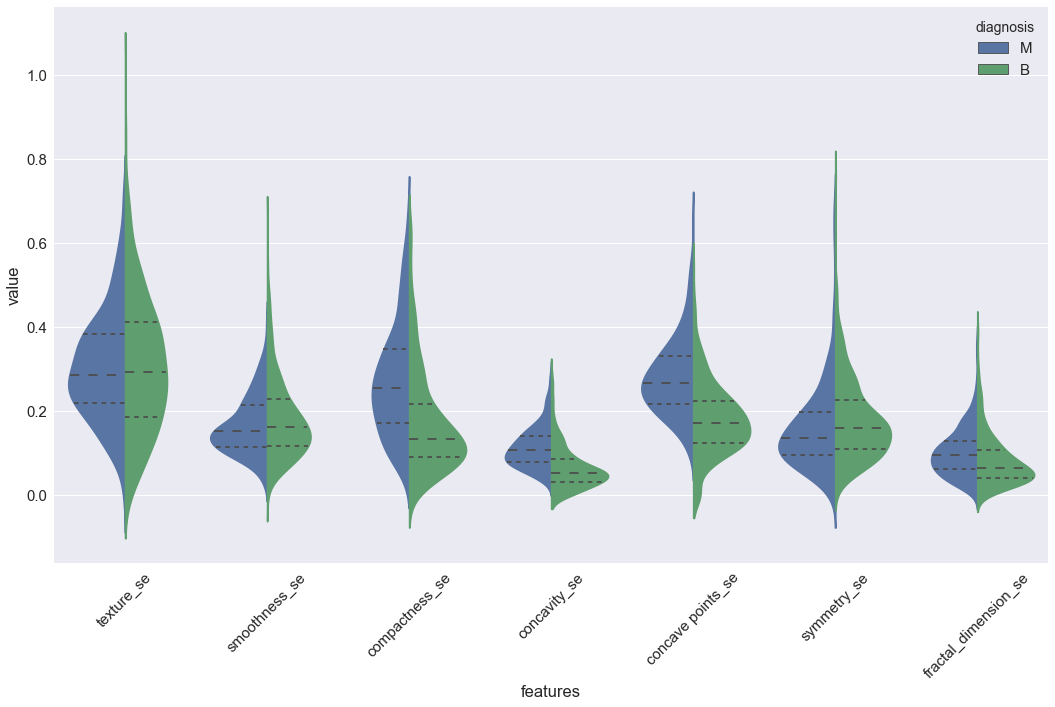

In [16]:
vs.violin_swarm_plots(data_cl_tr_cl,which='se_non_dims') # Last 10 features

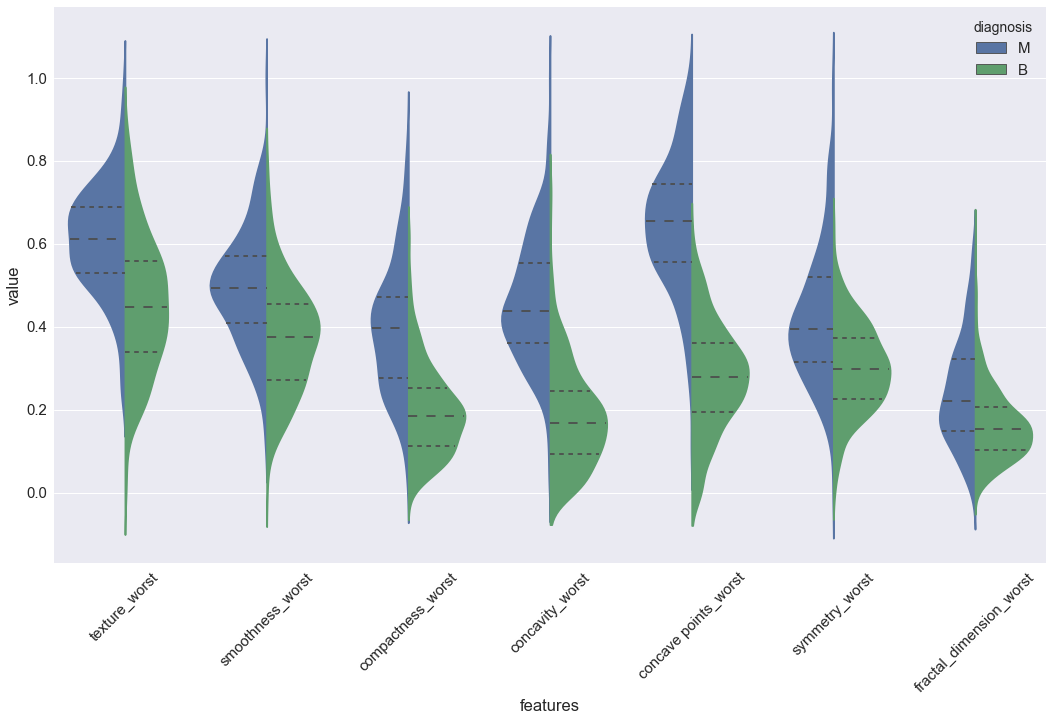

In [17]:
vs.violin_swarm_plots(data_cl_tr_cl,which='worst_non_dims') # Last 10 features

I am now going to discover any feature corerlations. Now, radius, area and perimeter would be features that are correlated - as seen even their distribution characteristics are similar as seen in the above violin plots. This is established in the following correlation heat map.

### Visualizing feature correlations

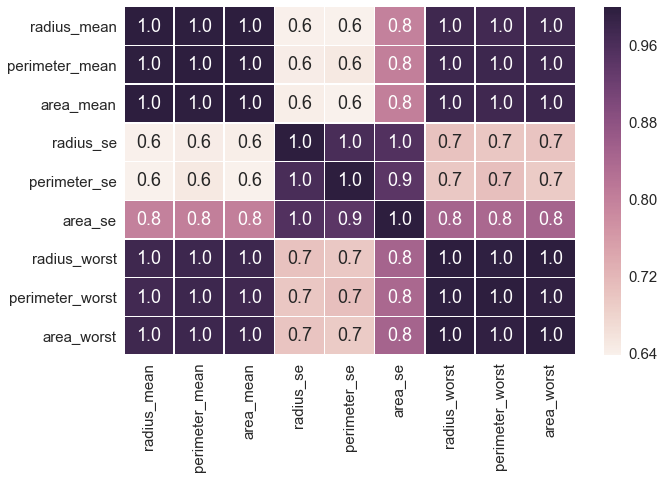

In [18]:
vs.observe_correlations(features_cl_tr_cl, which='only_dims')

Almost all numbers in the correlation matrix are high indicating high correlation between the features, as expected. So I can make a random choice to select all the `area` features (i.e., `area_mean`, `area_se`, `area_worst`). But again, from the above heatmap, `area_mean` is highly correlated with `area_se` and `area_worst`. So it wouldn't be a bad decision to only choose `area_mean` from these 9 features. 

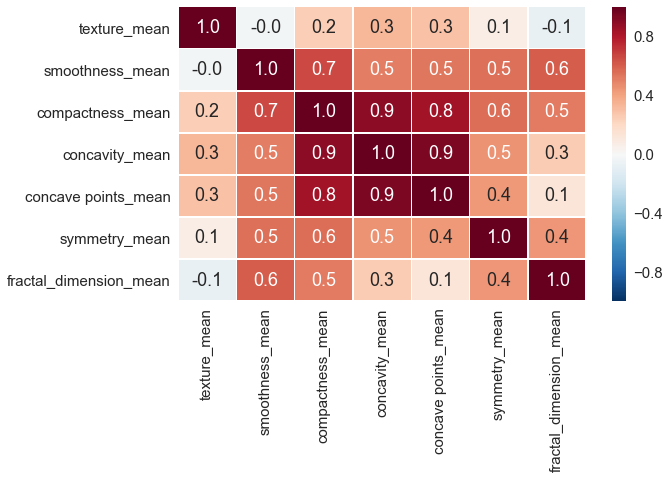

In [19]:
vs.observe_correlations(features_cl_tr_cl, which='mean_non_dims')

The above heatmap again shows high values in the centre. Implying high correlation between `compactness_mean`, `concavity_mean`, `concave_points_mean`

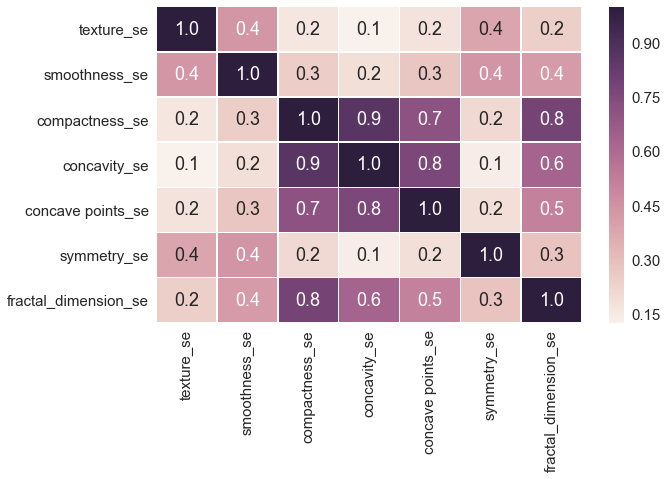

In [20]:
vs.observe_correlations(features_cl_tr_cl, which='se_non_dims')

Similarly the above heatmap indicates high correlation between `compactness_se`, `concavity_se`, `concave_points_se`

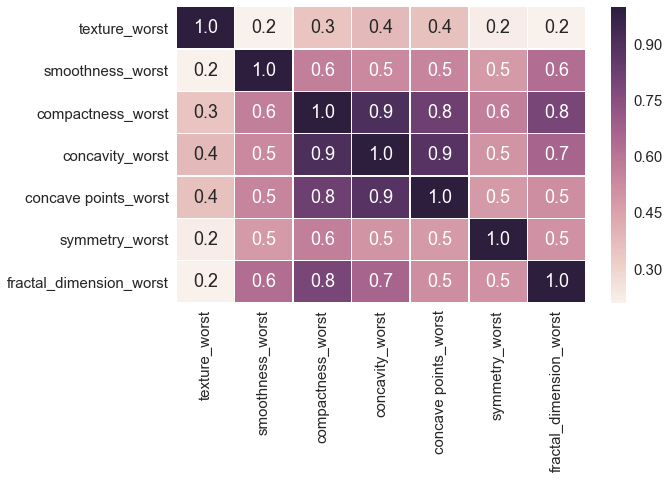

In [21]:
vs.observe_correlations(features_cl_tr_cl, which='worst_non_dims')

And there is a high correlation between `compactness_worst`, `concavity_worst`, `concave_points_worst`

The final conclusions of feature selection implies that keeping one of the correlated features in each of the list item below might probably aid in classification:
- radius_mean, radius_se, radius_worst
- perimeter_mean, perimeter_se, perimeter_worst
- area_se, area_worst
- smoothness_se, compactness_se, concave_points_se, concavity_se, symmetry_se
- compactness_worst, concavity_worst, concave_points_worst

So now the data has been scaled, transformed to reduce skweness, outliers have been removed, and feature correlations have been inspected. The next study would be feature trasnformation. By applying PCA to the `good_data`, new dimensions that best maximizes the variance of features can be discovered. In addition to finding these dimensions, PCA also reports the captured variance of each dimension.

### Feature Transformation by PCA

In [22]:
# Applying PCA
from sklearn.decomposition import PCA 

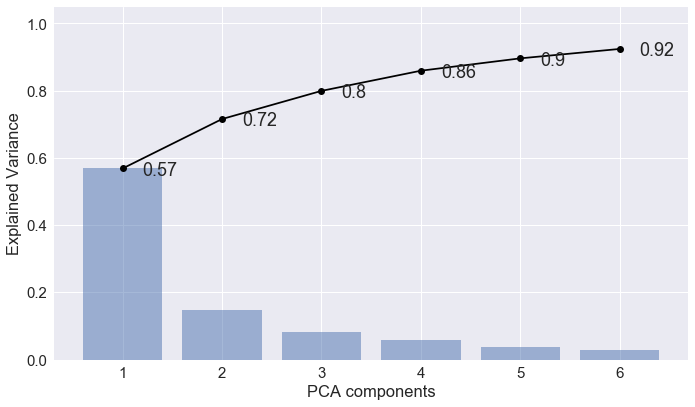

In [23]:
pca = PCA(n_components = 6).fit(features_cl_tr_cl)
vs.plot_pca_variance(pca)

The above graph indicates that 92% of variance in the data can be achieved with just 6 dimensions instead of the 30 features. 

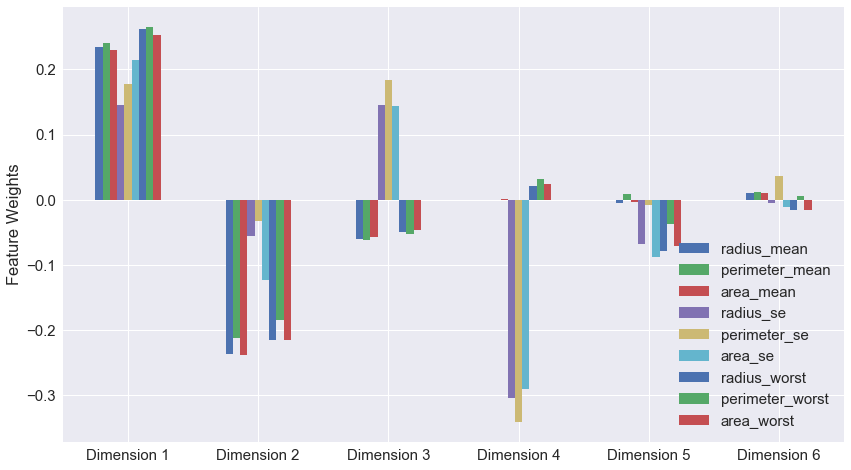

In [24]:
# Generate PCA results plot
vs.pca_results(features_cl_tr_cl, pca, which='only_dims')

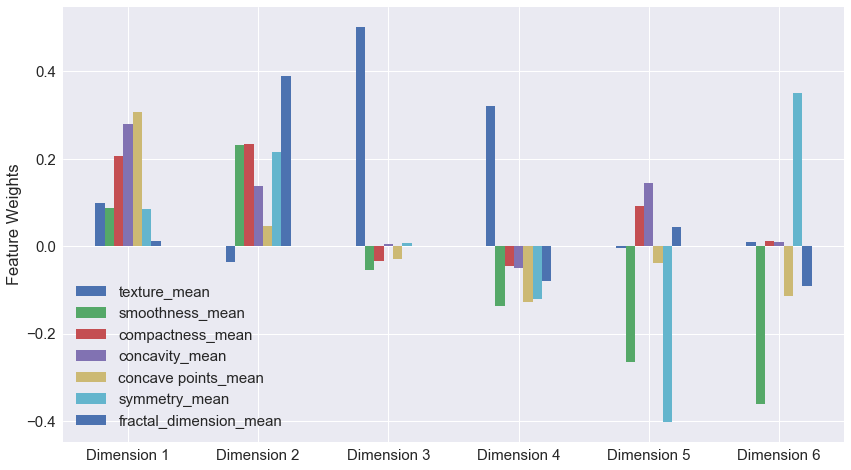

In [25]:
vs.pca_results(features_cl_tr_cl, pca, which='mean_non_dims')

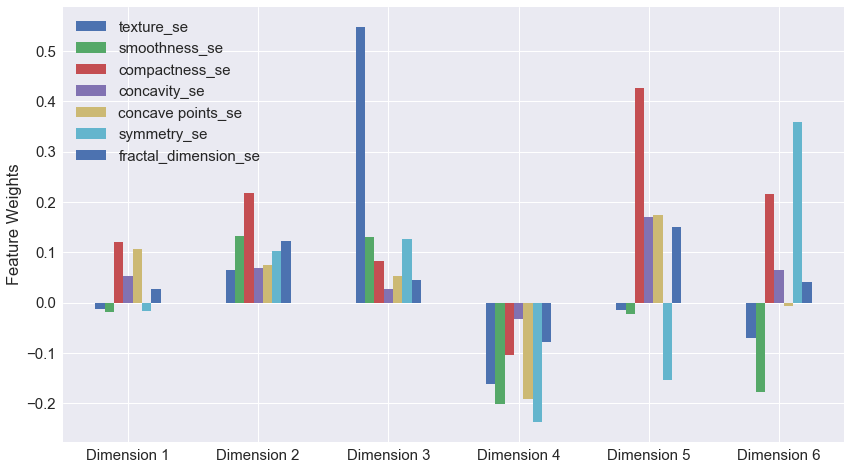

In [26]:
vs.pca_results(features_cl_tr_cl, pca, which='se_non_dims')

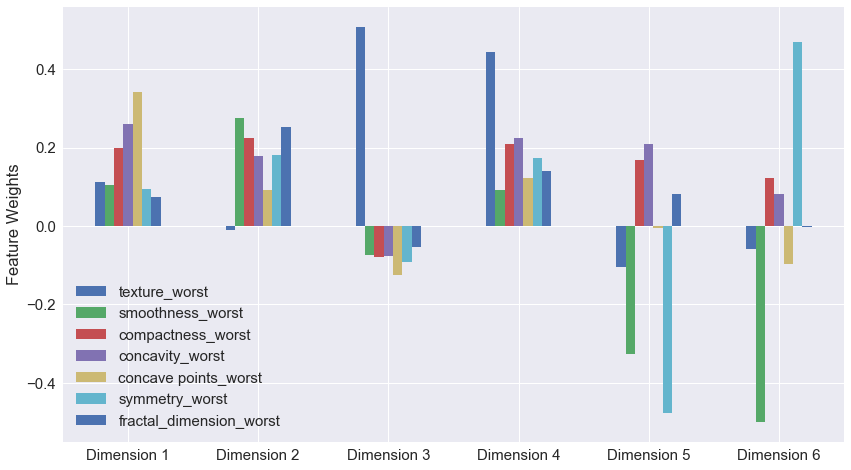

In [27]:
vs.pca_results(features_cl_tr_cl, pca, which='worst_non_dims')

The above plots indicate the following:

1. The first principal component dimension has all positive weights.

2. The second principal component dimension has positive weights for all features except those related to cell dimensions (radius, perimeter, mean). The first two dimensions contribute to upto 72% variance. 

3. `texture_mean`, `texture_se` and `texture_worst`, all three contribute heavily to the third principal component dimension

4. `radius, perimeter, area` "mean" and "worst" features contribute only to the first two principal component dimensions

In [28]:
reduced_features = als.return_reduced_data(features_cl_tr_cl, pca)
output_float = output_cl_tr_cl.apply(lambda x: als.encode_diagnosis(x))

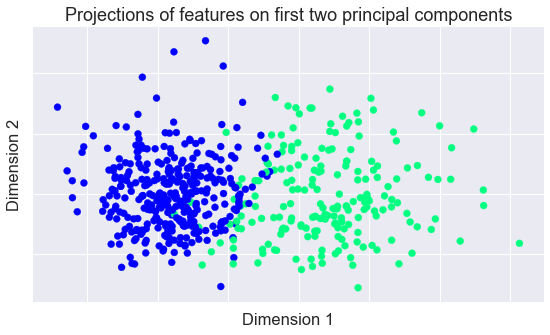

In [29]:
vs.scatter_two_dimensions(reduced_features, output_float)

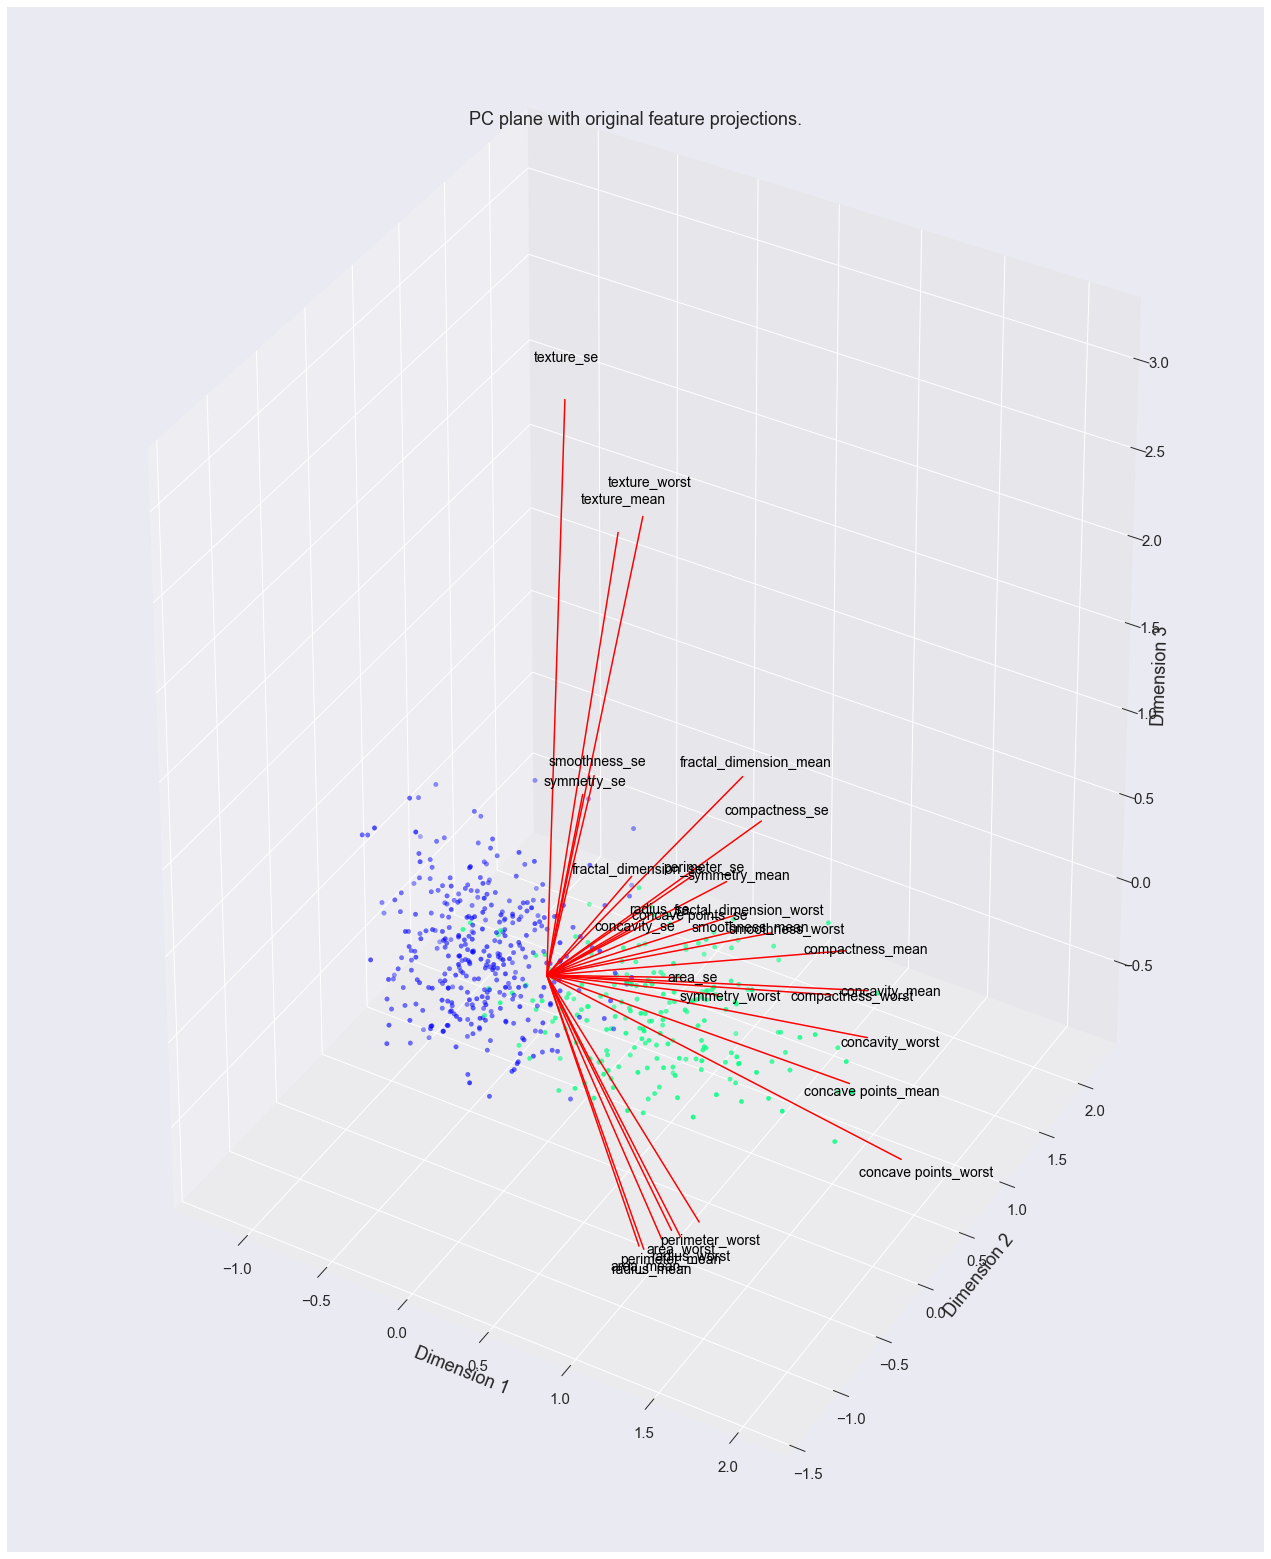

In [30]:
vs.biplot(features_cl_tr_cl, reduced_features, output_float, pca)

As can be seen from the above plots, quite a good classification is achieved with just 2 dimensions. It is not clear from the plots if adding the 3rd dimension improved classification. This can be known for sure only by applying classification models to the reduced features and analysing the scores. That is another reason why PCA is so important when dealing with data having a lot of features. It will minimize noise by only using the most important set of independent features

### Benchmark
As mentioned before, the Wisconsin breast cancer dataset is widely used and many researchers have applied machine learning techniques to determine the nature of a patient's lesion, whether malignant or not. A group in Turkey employed an SVM approach and reported higher than 99% accuracy, athough they used features such as single cell epithelial size, which is not usually included in a standard clinical report.~[1] Thus, there is still much interest and clinical relevance in the building of predictive models of this type.

Certain other models attempted by researchers include: 

- the use of a neural network support Vector Machine (SVM) classifier with the Radial Basis Function (RBF) kernel and a fuzzy classifier 
- combination of Decision Tree (DT) and Neural Network (NN) Algorithm
- combining GA (Genetic algorithm) and Decision Tree (DT) etc. ~[2-7]

The biggest challenge in most of these models however has been the inability to remove redundant/undesirable/wasteful features. Thus, this will the aspect that I'd focus in this project. Although I have proposed PCA/LDA as the primary aspects for feature selection, I will also spend more time understanding the effects of features from violin plots. Another idea that I am planning to explore is a computationally aggressive method, using ensemble methods guided by the results of feature selection. I am also considering the possibility of Gaussian Bayes over joint features, ie., by combining mean, se and largest values of each of the 10 features into one and building a Gaussian Naive Bayes model on top of that. 

The kernel in this link https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer uses several classifiers such as decision trees, SVM, KNNs etc. and the best score they have come up with is 94% accuracy. This will be my benchmark, that is, I am going to try different approaches to beat this score.

## III. Methodology

- Step 1:
    I m going to begin with applying models on the reduced data from above:
        1. Gaussian Naive Bayes (Since it is a simple model for initial testing)
        2. Decision tree/random forests (since this is a classification problem)
        3. Clustering (since it is a non-parametric approach as compared to sophisticated plane-separation approaches)
        4. SVM/Logistic regression 

- Step 2:
    Based on my understanding of the correlation maps above, I'll forcedly remove some features that I think are not important, apply PCA on the left over and use the above models agains to see if accuracy improves. (I can also use the feature selection modules during this process)
    

- Step 3:
    I will pick the best 3 models from among steps 1 & 2. And I will fine-tune the model hyperparameters.
    

- Step 4:
    I will also finally try some adaboost methods - which is a collection of weak learners on the selected features as well as on the reduced features. 

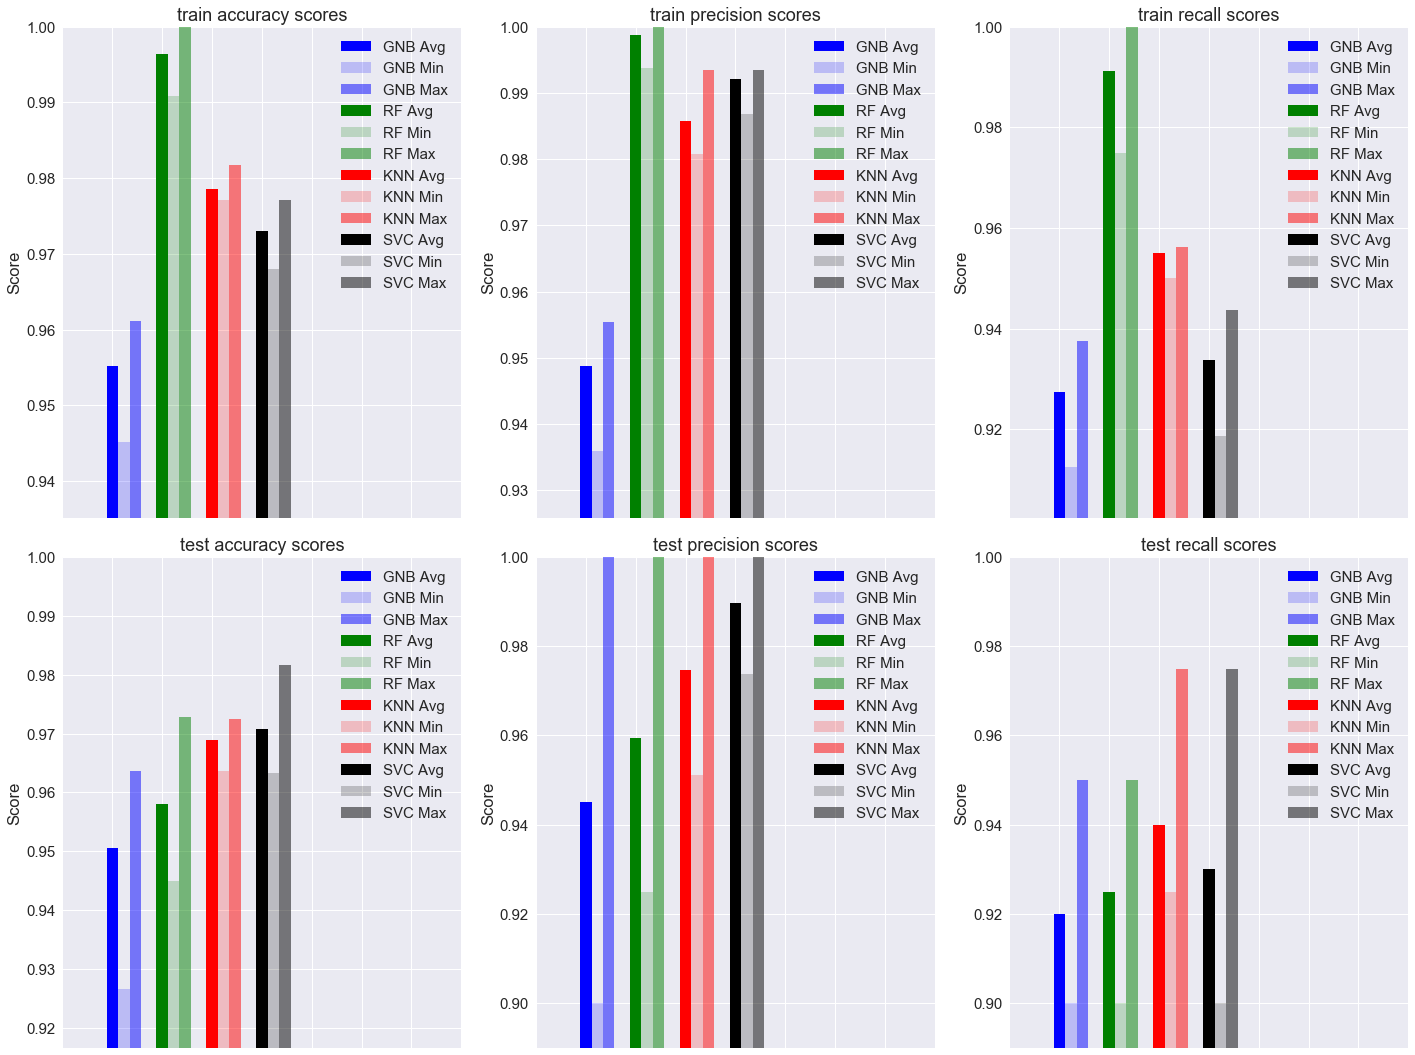

GNB:
Average fit time is:   0.002s
Average score time is: 0.005s

RF:
Average fit time is:   0.063s
Average score time is: 0.009s

KNN:
Average fit time is:   0.002s
Average score time is: 0.008s

SVC:
Average fit time is:   0.003s
Average score time is: 0.005s



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf_GNB = GaussianNB()
clf_RF = RandomForestClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clfs = [clf_GNB, clf_RF, clf_KNN, clf_SVM]
clf_labels = ['GNB', 'RF', 'KNN', 'SVC']
vs.plot_evaluation_metrics(clfs, clf_labels, reduced_features, output_float, cv=5)
scoring=['accuracy', 'precision', 'recall', 'f1']
for label, clf in zip(clf_labels, clfs):
    print('{}:'.format(label))
    als.print_evaluation_metrics(clf, reduced_features, output_float, scoring, cv=5)

The above plot leads to the following conclusions:
1. Gaussian Naive Bayes is the least performing of all as suspected
2. Random Forests have the best training scores (sometimes even perfect), but the testing scores are not so good. This indicates a biased model
3. KNN and SVC are comparable. 
    - KNN training accuracy scores seem higher than SVC. But KNN training precision scores are slightly lower than SVC
    - It can be observed that the variance of scores across the folds (as seen from the mean, min, max values) is lower in KNN for the test recall scores, but the behavior is vice-versa for the test precision scores
    - Also, KNN has low fitting time but higher score time and it is vice versa for SVC. However, in this case since the dataset is so small, it doesn't really matter

It would be wise to print the f-beta test scores for KNN and SVC models to make the final decision on best model

In [32]:
scoring=['f1']
for label, clf in zip(['KNN', 'SVC'], [clf_KNN, clf_SVM]):
    print('{}:'.format(label))
    als.print_evaluation_metrics(clf, reduced_features, output_float, scoring, cv=5, only_times=False, print_times=False)
    print('\n')

KNN:
                    |  Avg    |  Min    |  Max    |
   train         f1 |  0.970  |  0.968  |  0.975  |
    test         f1 |  0.957  |  0.949  |  0.963  |


SVC:
                    |  Avg    |  Min    |  Max    |
   train         f1 |  0.962  |  0.955  |  0.968  |
    test         f1 |  0.959  |  0.947  |  0.975  |




The next step of the strategy is to remove some of the features observed from data exploration/visualization (i.e. feature selection), followed by PCA transformation and use of classifier model on that. 

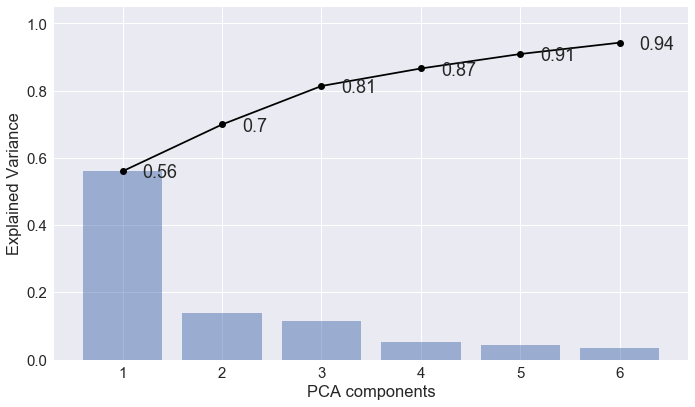

In [33]:
cols = ['radius_mean', 'radius_se', 'radius_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_se', 'area_worst', 'smoothness_se', 'compactness_se', 'concave points_se', 'concavity_se', 'symmetry_se']
selected_features = pd.DataFrame(features_cl_tr_cl)
for col in cols:
    selected_features = selected_features.drop([col],axis=1)
pca = PCA(n_components = 6).fit(selected_features)
vs.plot_pca_variance(pca)

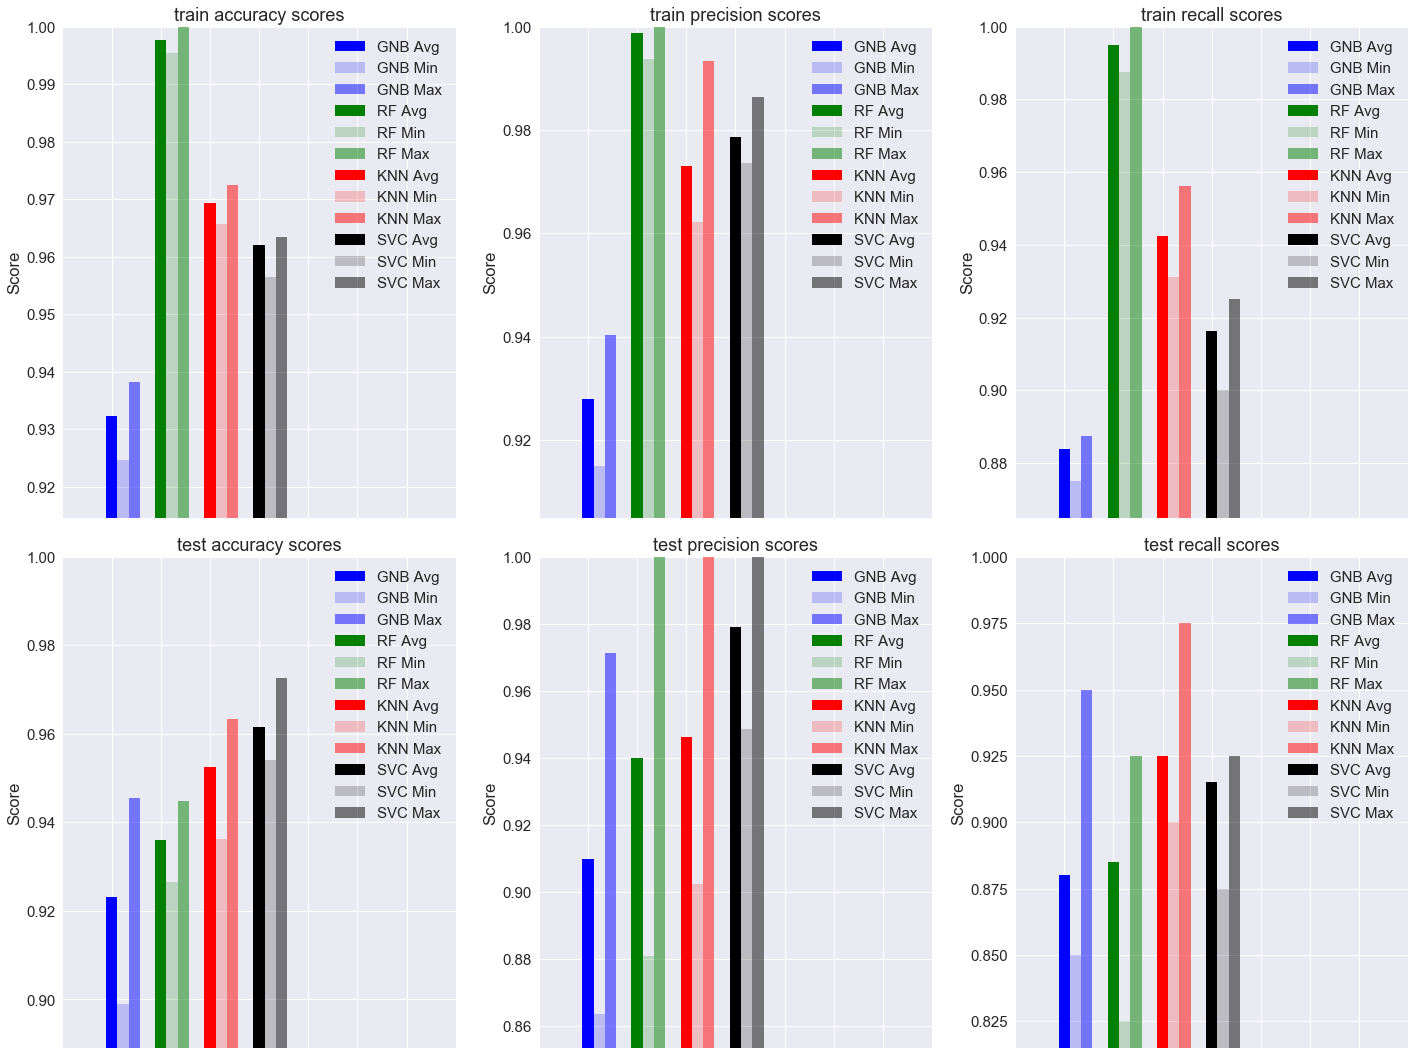

In [34]:
selected_reduced_features = als.return_reduced_data(selected_features, pca)
clf_GNB = GaussianNB()
clf_RF = RandomForestClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clfs = [clf_GNB, clf_RF, clf_KNN, clf_SVM]
clf_labels = ['GNB', 'RF', 'KNN', 'SVC']
output_float = output_cl_tr_cl.apply(lambda x: als.encode_diagnosis(x))
vs.plot_evaluation_metrics(clfs, clf_labels, selected_reduced_features, output_float, cv=5)

The results do not indicate any model improvement, rather there might be a performance drop due to the selection of features before transformation. There is also an indication of overfitting, since training scores are much better, while testing score are worse.

The final step for model refinement is fine tuning of the model hyper parameters. 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, make_scorer
from sklearn.model_selection import ShuffleSplit

knn = KNeighborsClassifier()
parameters = {'n_neighbors':list(range(2,7)), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
scoring=make_scorer(fbeta_score, beta=0.5)
clf = GridSearchCV(knn, parameters, scoring=scoring, cv=5)
clf.fit(reduced_features, output_float)
results_pd = pd.DataFrame(clf.cv_results_)

/Users/gouthamisenthamaraikkannan/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/gouthamisenthamaraikkannan/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/gouthamisenthamaraikkannan/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(

In [36]:
select_cols = ['mean_train_score', 'mean_test_score', 'param_algorithm', 'param_n_neighbors', 'rank_test_score', 'std_test_score']
results_pd[select_cols].sort_values(['rank_test_score'], ascending=True).reset_index(drop=True).head(8)

,mean_train_score,mean_test_score,param_algorithm,param_n_neighbors,rank_test_score,std_test_score
0,0.981039,0.980809,brute,4,1,0.012963
1,0.981039,0.980809,auto,4,1,0.012963
2,0.981039,0.980809,kd_tree,4,1,0.012963
3,0.981039,0.980809,ball_tree,4,1,0.012963
4,0.977460,0.969385,ball_tree,6,5,0.005567
5,0.977460,0.969385,kd_tree,6,5,0.005567
6,0.977460,0.969385,brute,6,5,0.005567
7,0.977460,0.969385,auto,6,5,0.005567


The results indicate that all algorithms give same result. Only the `n_neighbors` parameter has any significant effect on the scores

In [37]:
best_clf = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
next_best_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

## IV. Results

In [38]:
scoring=['accuracy', 'precision', 'recall', 'f1']
print('Best obtained from grid search:\n')
als.print_evaluation_metrics(best_clf, reduced_features, output_float, scoring, only_times=False)
print('\nSecond best model from grid search, it has lower variance of test scores across folds:\n')
als.print_evaluation_metrics(next_best_clf, reduced_features, output_float, scoring, only_times=False)

Best obtained from grid search:

Average fit time is:   0.002s
Average score time is: 0.007s

                    |  Avg    |  Min    |  Max    |
   train   accuracy |  0.973  |  0.968  |  0.977  |
   train  precision |  0.995  |  0.987  |  1.000  |
   train     recall |  0.930  |  0.925  |  0.950  |
   train         f1 |  0.961  |  0.955  |  0.968  |
    test   accuracy |  0.973  |  0.955  |  0.991  |
    test  precision |  0.995  |  0.973  |  1.000  |
    test     recall |  0.930  |  0.900  |  0.975  |
    test         f1 |  0.961  |  0.935  |  0.987  |

Second best model from grid search, it has lower variance of test scores across folds:

Average fit time is:   0.001s
Average score time is: 0.006s

                    |  Avg    |  Min    |  Max    |
   train   accuracy |  0.979  |  0.977  |  0.982  |
   train  precision |  0.986  |  0.981  |  0.994  |
   train     recall |  0.955  |  0.950  |  0.956  |
   train         f1 |  0.970  |  0.968  |  0.975  |
    test   accuracy |  0.969

## V. Conclusion

Thus, as I had set out, I have addressed the binary classification problem of cancer diagnosis from FNA tests, based on the following strategy 

1. I did an extensive data exploratory and visualization analysis of the 30 features constituting the test results. 
    - Log transformation and min max scaling was applied
    
    - Outliers were detected based on points lying outside the interquartile range. Points that were identified as outliers in the most number of features were dropped. This process resulted in losing about 4% of the data. And the loss was more or less equally distributed, this maintaining the class balance. 
    
    - Violin plots, which are kernel density estimation plots divided by class type were plotted for all the features. It allowed to visualize which features were most likely to affect classification. 
    
    - Correlation heat maps were also plotted to further identify the relation between the features
   
    - The above visualization studies would serve as a guide for heuristic feature selection    

2. Following the above analysis, I attempted feature transformation based on PCA. The feature weights composing the first 6 principal component dimensions were represented. And scatter plots of first two and three dimensions were also plotted to visualize the separation achieved with just 3 transformed features. 

3. After feature transformation, I used the cleaned, reduced, transformed features in classification algorithms like Gaussian Bayes, Random Forests, (non-parametric) K-nearest neighbors and support vector classifiers. The classifiers' scores were estimated across 5 cross validation folds, and the mean, worst and best values of them were plotted to compare them. The KNN classifier came first among them on various aspects

4. I also tried to drop features that were observed as not useful from the first step and then followed it with a PCA and classification. It seemed that dropping those features actually resulted in a small drop of the results 

5. Model hyper parameters were also optimized by a simple grid search algorithm as available in sklearn scikit 

6. The final test scores that I have are accuracy: 0.973, precision: 0.995 and recall: 0.93. This definitely beats the benchmark score of 0.94 accuracy as I had introduced in the earlier sections. 

7. I have also printed out a second-best classifier which has slightly lower scores, but also lower variance of testing scores across the cross validation splits. However, in order to make strong conclusions out of this, it is defnitely necessary to have more data points
    
Scope for future work:
1. A more useful analysis would be to perform feature selection using a simple classifier, maybe a decision tree. This would allow us to further explore the effects of feature selection before feature tranformation 

2. Deep learning algorithms could be tested as well, as it appears that the decision boundary between malign and benign cases is very non-linear 

3. Generally there is a limitation of data. There are only a total of 500 odd points. This presents a challenge in  analysing the effects of overfitting as well as the effects of increasing the number of folds in cross validation etc. 